# Множественная линейная регрессия на чистых данных
## Цель работы

Познакомиться с основными приемами работы с множественными регрессионными моделями с использованием библиотеки sklearn.

Содержание работы

1-  Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).

2-  Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк. Выведите первые строки датасета.

3-  Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

4- Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

5- Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

## Методические указания

Отчет по лабораторной работе сдается в виде файла интерактивного ноутбука Jupyter notebook и должен включать весь программный код, реализующий задания лабораторной работы, подробные пояснения, обоснования и выводы там, где это требуется в виде текстовых ячеек.

Для начала работы как всегда выполним стандартный импорт необходимых библиотек:

In [1]:

# Для полноценной работы с регрессионным анализом данных на потребуются следующие библиотеки языка Python:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Теперь мы можем приступить к чтению данных. Для этой работы представлено сразу 50 однотипных датасетов. Мы для примера возьмем '0x.csv', '0y.csv'. Читать данные можно многими способами, но мы воспользуемся самым простым чтением по URL:

In [2]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y= pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

Посмотрим формат файла с данными - состав и названия полей:

In [3]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [4]:
x.shape, y.shape

((387, 5), (387, 1))

Здесь мы должны заметить сразу несколько вещей. Во-первых, обе переменные представлют собой двумерные массивы. Точнее они представлены в виде DataFrame. В матрице атрибутов (X) 387 строк и 5 столбцов. Это значит, что в датасете описаны 387 объектов и у каждого есть 5 признаков. Или, можно сказать, что в X 5 векторов признаков по 387 значенй. Важно то, что по строкам у нам объекты, а по столбцам - атрибуты (характеристики).

В целевой переменной (Y) у нас один стоблец и 387 строчек. Очень важно, чтобы количество строк в обоих переменных совпадало. Фактически, Y пердставляет собой вектор-столбец. То есть один единственный атрибут описан для 387 объектов.

Такое представление данных подходит для начала машинного обучения. Все, что нужно совпадает. Теперь мы можем приступать к созданию и обучению модели. Для этого сначала импортируем нужный объект из библиотеки scikit-learn:

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

В данном случае нам нужна модель линейной регрессии, которая является частью пакета "linear_model" и называется LinearRegression. Про другие модели и пакеты данной библиотеки можно узнать из документации.

Создадим объект модели:

In [6]:
models = [LinearRegression() for i in range(5)]


Для начала мы построим модель парной регрессии от одного из признаков в датасете. Для этого из матрицы атрибутов нужно вытащить один столбец. Можно сделать это так: x[1]. Напоминаем, что в DataFrame по умолчанию индексация происходит по столбцам. Но тут возникает проблема. Дело в том, что все библиотечные средства предполагают, что X - это двумерный массив. А взятие одного столбца возвращает не DataFrame, а Series - одномерный массив. Превратить его в двумерный можно многими разными способами, но в Pandas можно взять несколкьо столбцов из датафрейма. Такая операция вернет всегда именно датафрейм. А нам нужен датафрейм из одного столбца. Сделать это можно так: x[[1]]. Итак, возьмем один столбец и обучим парную регрессию его с целевой переменной:

In [7]:
estimators = [models[i].fit(x[[i]], y) for i in range(5)]
scores = [estimators[i].score(x[[i]], y) for i in range(5)]

estimates = [models[i].predict(x[[i]]).reshape(1, 387)[0] for i in range(5)]
acc_scores = [accuracy_score(y, estimates[i]) for i in range(5)]










ValueError: continuous is not supported

Данный метод подстроил коэффициенты линейной модели таким образом, чтобы функция модели была как можно ближе к точкам. Сами коэффициенты тоже можно посмотреть. Получаем коэффициенты bn:

In [8]:
binary.coef_

NameError: name 'binary' is not defined

Метод predict() рассчитывает теоретические значения признака:

In [9]:
binary.predict(x[[1]])

NameError: name 'binary' is not defined


Конечно, вручную сравнивать их с реальными (эмпирическими) не нужно. Гораздо проще построить их на графике. Построить точки очень просто:

Для построения линии модели просто использовать plot вот так: plt.plot(x[1], y) будет уже неправильно. Лучше построить равномерное распределение точек от минимального до максимального по X и уже по нему расчитать модельные значения:

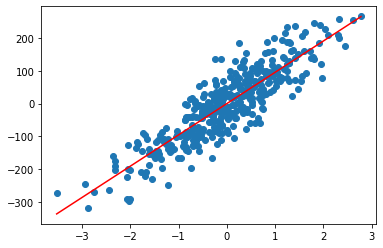

In [17]:

plt.scatter(x[1], y)
xxx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xxx, binary.predict(xxx), c='r')

Для оценки качества построенной регрессии можно использовать целый ряд показателей. Одним из самых простых и универсальных является коэффициент детерминации (R2-score). Как использовать его читайте в официальной документации sklearn. Методом score можно узнать значение метрики эффективности полученной модели:

In [16]:
from sklearn.metrics import r2_score
r2_score(x[1], y)


-11663.620529181258

## построениe множественной регрессии

Для построения множественной регрессии выполним те же шаги, но будем использовать полный датасет:

In [26]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

Теперь точность возросла до 0.99, что говорит о почти идеальной модели. Вообще чем больше информации мы подаем на вход моделям машинного обучения, тем на более сильный результат мы можем рассчитывать.

В модели множественной регрессии уже не удасся построить такой красивый и однозначный график. Для того, чтобы хоть как-то увидеть, как модель соотносится с точками, можно построить график зависимости теоретических значений от эмпирических, то есть как предсказанные значения отличаются от истинных:

[[15.79537523 93.21521093 37.19410687 31.19129121 -0.23773114]]
[[95.52010745]]


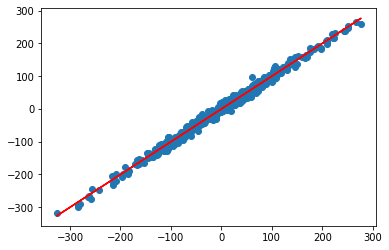

In [21]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')
print(multiple.coef_)
print(binary.coef_)

Дополнительно на этом графике мы добавили линию y=y. Это всегда будет прямая, даже если мы будем использовать нелинейные модели. Обратите внимание, что на данном графике по обоим осям Y - то есть целевая переменная:

Такой график наряду с диагностическими кривыми можно использовать для диагностики многомерных задач регресии.



## Задания для самостоятельного выполнения
1- Сравните коэффициенты парной и множественной регрессии до и после обучения.

2-Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

3- Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели более точные.

4- Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

5-(*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y= pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

models = [LinearRegression() for i in range(5)]
estimators = [models[i].fit(x[[i]], y) for i in range(5)]
scores = [estimators[i].score(x[[i]], y) for i in range(5)]

estimates = [models[i].predict(x[[i]]).reshape(1, 387)[0] for i in range(5)]
max_errors = [max_error(y, estimates[i]) for i in range(5)]
r_sqrd = [r2_score(y, estimates[i]) for i in range(5)]

sc_table = pd.DataFrame({'Scores' : scores, 'Max errors': max_errors, 'R2 coeff': r_sqrd})
print(sc_table)


     Scores  Max errors  R2 coeff
0  0.043643  289.747058  0.043643
1  0.769974  159.965566  0.769974
2  0.187945  317.717310  0.187945
3  0.047470  301.831888  0.047470
4  0.000172  318.221440  0.000172


In [19]:
import time
times = []
poly_regs = [PolynomialFeatures(degree=i, include_bias=False) for i in range(2, 6)]

poly_features = [i.fit_transform(np.array(x[[1]])) for i in poly_regs]
poly_reg_models = [LinearRegression() for i in range(2, 6)]

for i in range(4):
    start = time.time()
    poly_reg_models[i].fit(poly_features[i], y)
    times.append(time.time() - start)
print(times)

[0.008044719696044922, 0.003321409225463867, 0.003233194351196289, 0.0033278465270996094]


## Контрольные вопросы
1- Как должны выглядеть данные для модели машинного обучения?

2- В чем физический смысл коэфициентов линейной регрессии?

3- Чем множественная регрессия отличается от парной?

4- Какую функцию ошибки использует модель линейной регрессии?

5- Какие метрики эффективности можно применять для оценки регрессионных моделей?

6- Какие еще регрессоры есть в библиотеке sklearn?

7- Почему для визуализации модели нельзя использовать предсказанные значения по датасету?


## Дополнительные задания:

1-Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

2- (*) Модифицируйте класс модели из предыдущей лабораторной работы таким образом, чтобы он работал в режиме множественной регрессии. Для этого на вход ему в качестве X должен подаваться датафреймиз произвольногоколичества строк.

In [20]:
poly_regs = [PolynomialFeatures(degree=2, include_bias=False),  PolynomialFeatures(degree=3, include_bias=False),
            PolynomialFeatures(degree=10, include_bias=False)]

poly_features_new = [[i.fit_transform(np.array(x[[j]])) for i in poly_regs] for j in range(5)]
poly_reg_models_new = [LinearRegression() for i in range(15)]

estimators_new = [poly_reg_models_new[i].fit(poly_features_new[i // 5][i % 3], y) for i in range(15)]
scores = [estimators_new[i].score(poly_features_new[i // 5][i % 3], y) for i in range(15)]
print(scores)




[0.04367170367915507, 0.04376506816920167, 0.05035596325168745, 0.04367170367915507, 0.04376506816920167, 0.7726769307411923, 0.7699942588883133, 0.7711184109235001, 0.7726769307411923, 0.7699942588883133, 0.19280163734543854, 0.20440944561264418, 0.19000787278473819, 0.19280163734543854, 0.20440944561264418]
